<a href="https://colab.research.google.com/github/PaulToronto/Applied-Geospatial-Data-Science-with-Python---Book/blob/main/2_2_Contextily_Place_Object.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Contextily Place Object

## Imports

In [1]:
!pip install contextily

In [2]:
import pandas as pd
import geopandas as gpd
import contextily as cx
from contextily import Place
import matplotlib.pyplot as plt
import rasterio as rio
from rasterio.plot import show as rioshow
from shapely.geometry import box, Point

In [3]:
from google.colab import drive

drive.mount('/content/gdrive')

drive_path = '/content/gdrive/MyDrive/Colab Notebooks/Data Science/Applied Geospatial Data Science with Python - Book/data/'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## Instantiating a `Place` object

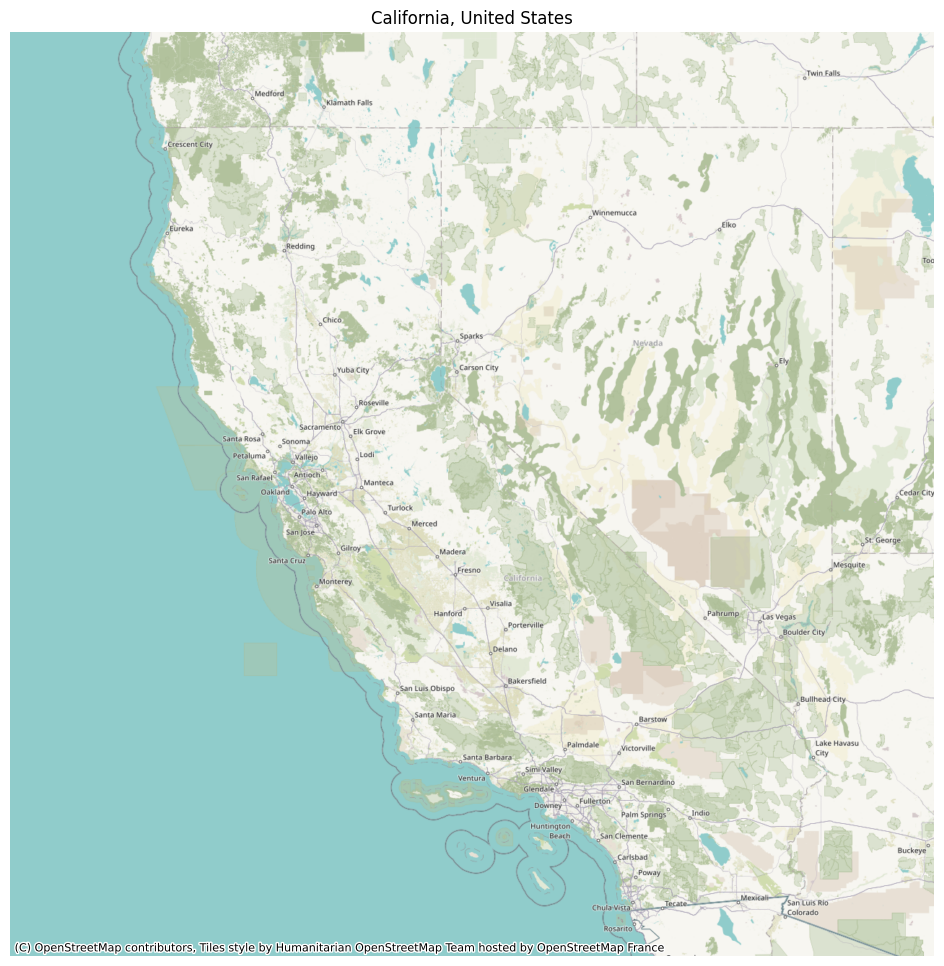

In [4]:
california = Place('California')
ax = california.plot()

In [5]:
california.zoom, california.place

(7, 'California, United States')

In [6]:
california

Place : California, United States | n_tiles: 1 | zoom : 7 | im : (1280, 1280)

## Zoom level

- the zoom level is detected automatically, but it can be adjusted through the `zoom` argument
-increasing the zoom level by one, leads to four times as many tiles being downloaded

In [7]:
for zoom_level in range(1, 16):
    cx.howmany(*california.bbox, zoom_level, ll=True)

Using zoom level 1, this will download 1 tiles
Using zoom level 2, this will download 1 tiles
Using zoom level 3, this will download 2 tiles
Using zoom level 4, this will download 2 tiles
Using zoom level 5, this will download 4 tiles
Using zoom level 6, this will download 9 tiles
Using zoom level 7, this will download 25 tiles
Using zoom level 8, this will download 72 tiles
Using zoom level 9, this will download 288 tiles
Using zoom level 10, this will download 1085 tiles
Using zoom level 11, this will download 4140 tiles
Using zoom level 12, this will download 16303 tiles
Using zoom level 13, this will download 64428 tiles
Using zoom level 14, this will download 256768 tiles
Using zoom level 15, this will download 1025984 tiles


In [8]:
toronto = Place('Toronto')

for zoom_level in range(1, 20):
    cx.howmany(*toronto.bbox,zoom_level, ll=True)

Using zoom level 1, this will download 1 tiles
Using zoom level 2, this will download 1 tiles
Using zoom level 3, this will download 1 tiles
Using zoom level 4, this will download 1 tiles
Using zoom level 5, this will download 1 tiles
Using zoom level 6, this will download 1 tiles
Using zoom level 7, this will download 1 tiles
Using zoom level 8, this will download 1 tiles
Using zoom level 9, this will download 4 tiles
Using zoom level 10, this will download 6 tiles
Using zoom level 11, this will download 16 tiles
Using zoom level 12, this will download 42 tiles
Using zoom level 13, this will download 130 tiles
Using zoom level 14, this will download 475 tiles
Using zoom level 15, this will download 1728 tiles
Using zoom level 16, this will download 6816 tiles
Using zoom level 17, this will download 26880 tiles
Using zoom level 18, this will download 107136 tiles
Using zoom level 19, this will download 427776 tiles


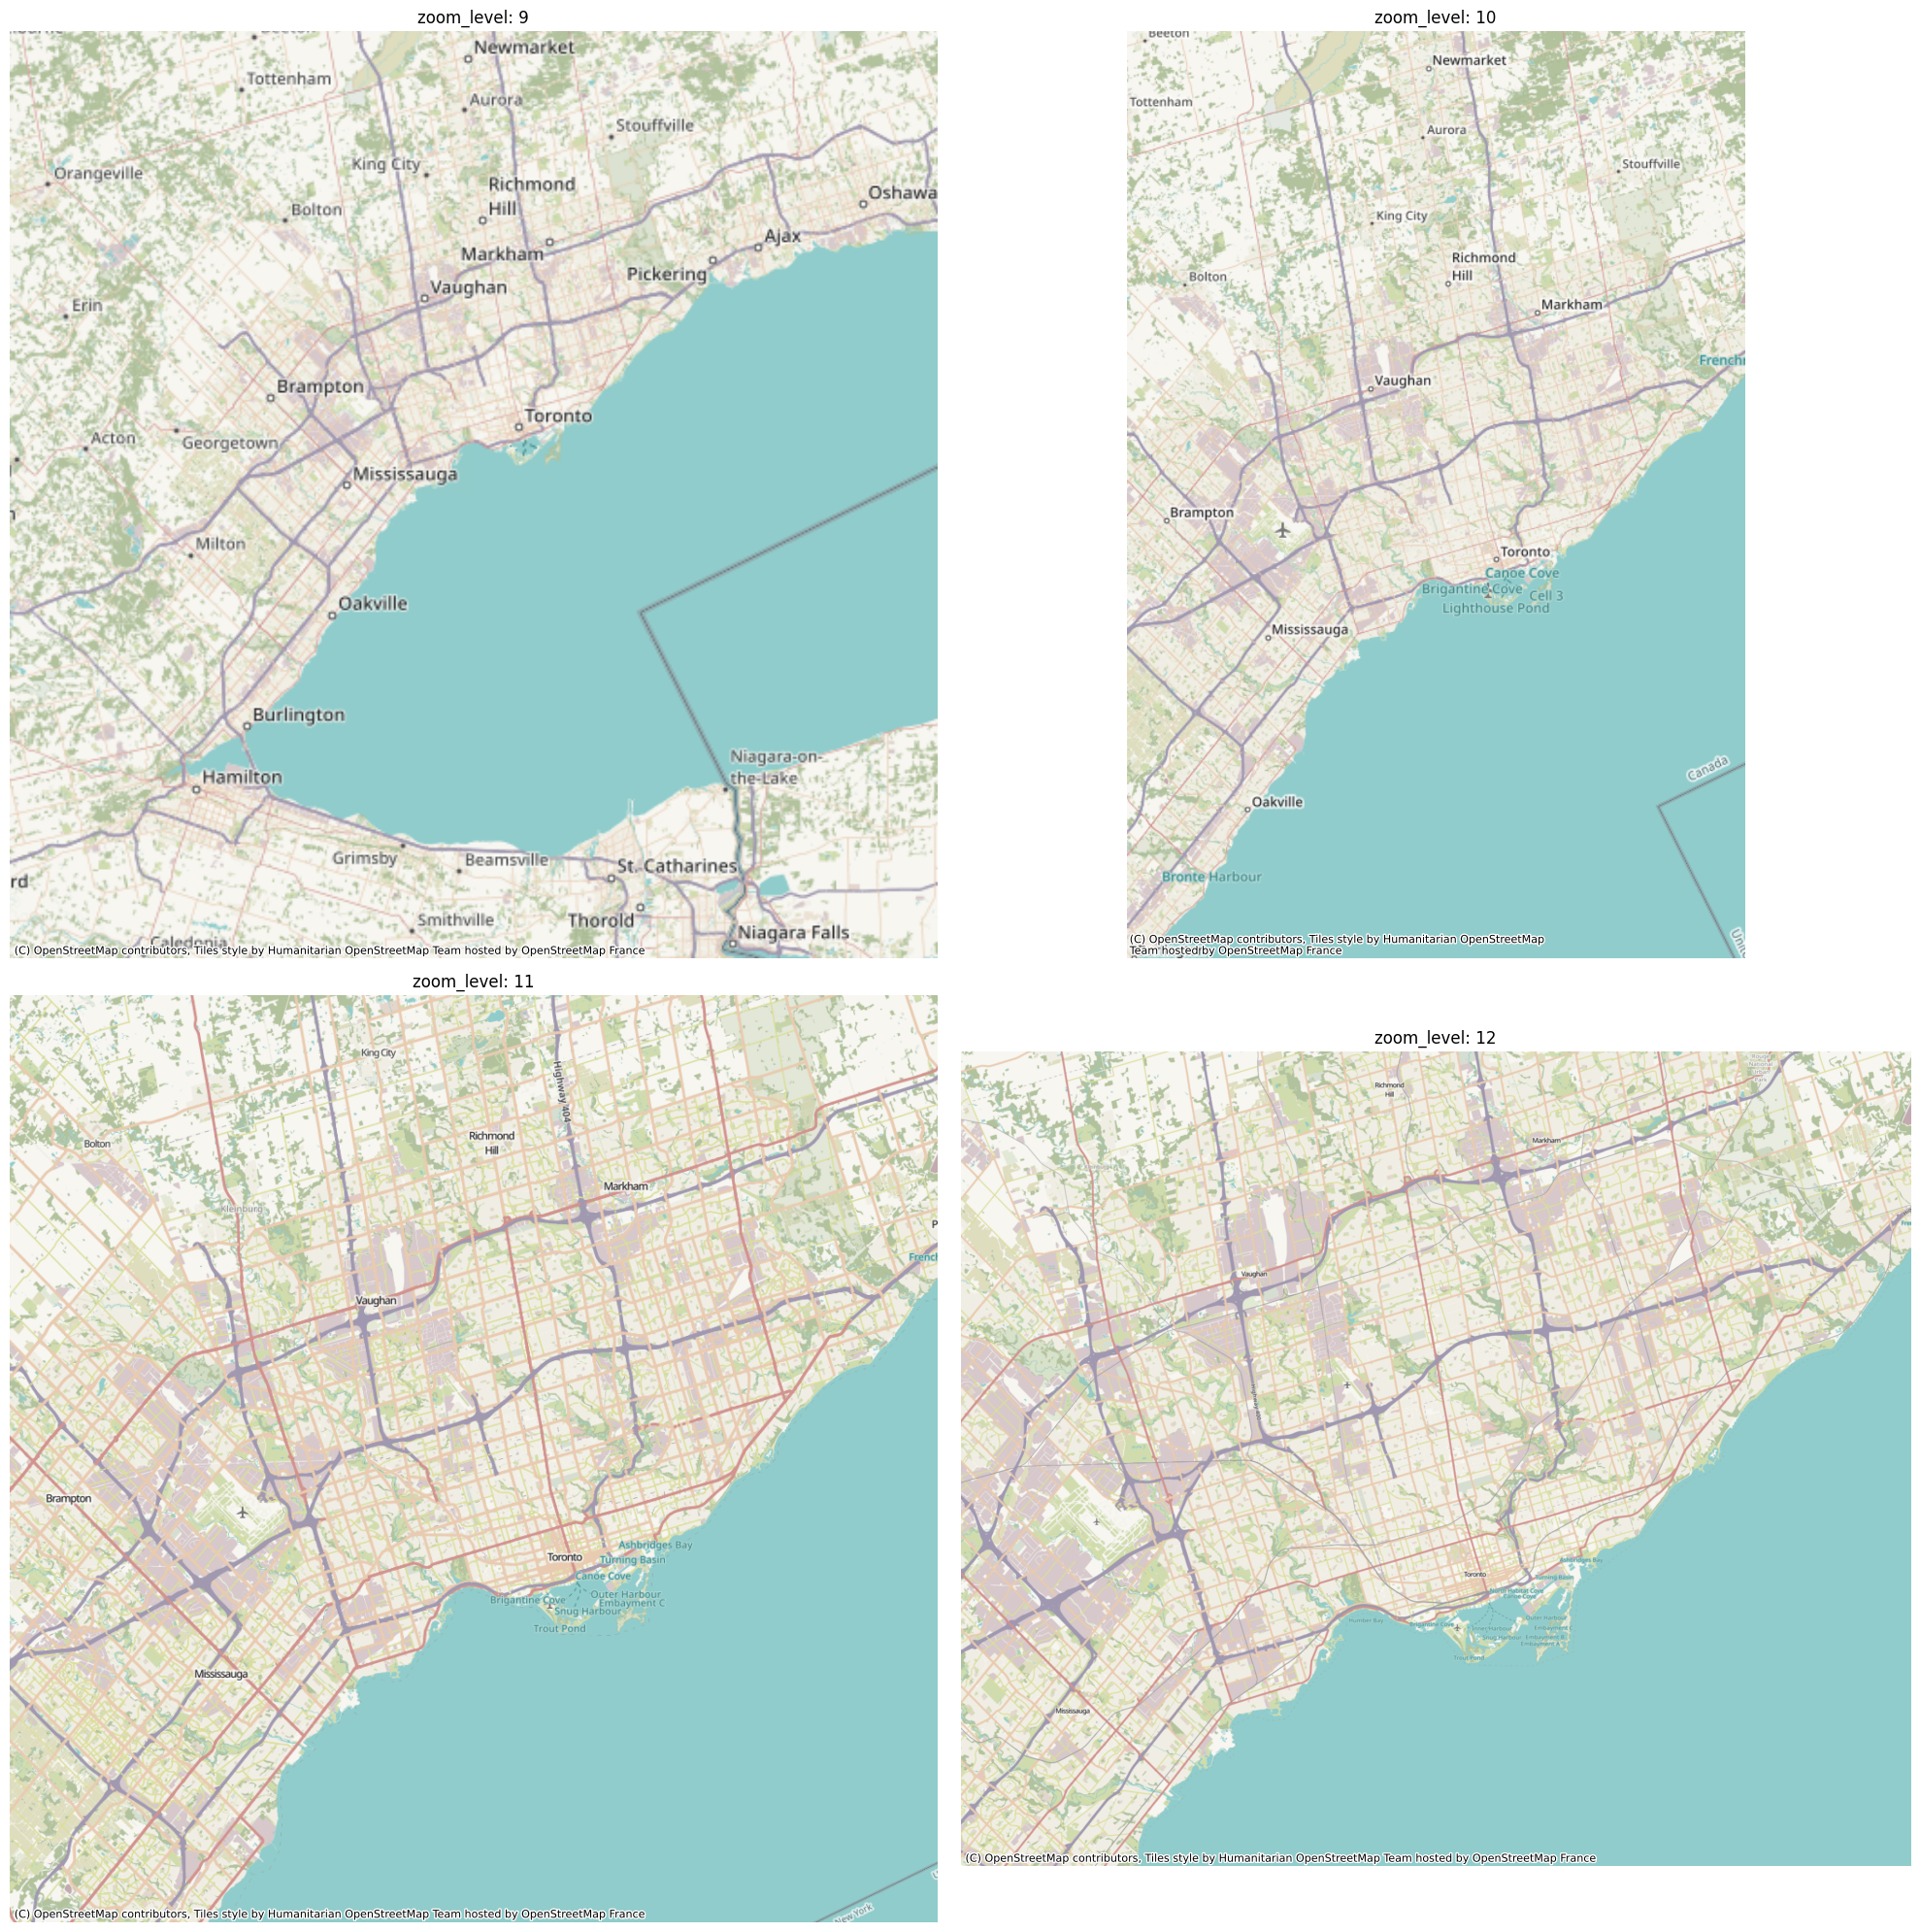

In [9]:
fig, axs = plt.subplots(2, 2, figsize=(20, 20))

for i, zoom_level in enumerate([9, 10, 11, 12]):
    ax = Place('Toronto', zoom=zoom_level).plot(ax=axs.flatten()[i])
    ax.set_title('zoom_level: ' + str(zoom_level))
    ax.axis('off')

plt.tight_layout()

## Setting the basemap provider with the `source` argument

In [10]:
# this cell works in Colab but doesn't render in github

#fig, axs = plt.subplots(2, 2, figsize=(20, 20))

#for i, source in enumerate([cx.providers.OpenTopoMap,
#                            cx.providers.OpenStreetMap.Mapnik,
#                            cx.providers.OpenStreetMap.HOT,
#                            cx.providers.CartoDB.Positron]):
#    ax = Place('Toronto', source=source).plot(ax=axs.flatten()[i])
#    ax.axis('off')
#    plt.tight_layout()

## Saving the image returned by the `Place` API

In [11]:
# use the `path` argument to specify where it is saved
caracas = Place('Caracas', path=drive_path + 'caracas.tif')

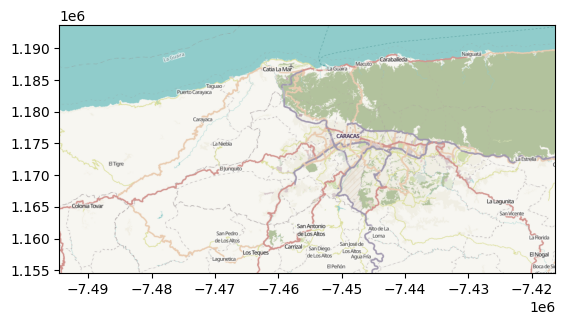

In [12]:
with rio.open(drive_path + 'caracas.tif') as r:
    rioshow(r)

## Exploring the `Place` object's attributes

In [13]:
type(toronto)

contextily.place.Place

### The image of the `Place` object: `im`

In [14]:
toronto.im

array([[[247, 246, 241, 255],
        [247, 246, 241, 255],
        [247, 246, 241, 255],
        ...,
        [217, 222, 203, 255],
        [219, 225, 205, 255],
        [245, 243, 237, 255]],

       [[247, 246, 241, 255],
        [247, 246, 241, 255],
        [247, 246, 241, 255],
        ...,
        [178, 194, 157, 255],
        [178, 194, 157, 255],
        [194, 206, 177, 255]],

       [[247, 246, 241, 255],
        [247, 246, 241, 255],
        [247, 246, 241, 255],
        ...,
        [178, 194, 157, 255],
        [178, 194, 157, 255],
        [178, 194, 157, 255]],

       ...,

       [[247, 246, 241, 255],
        [247, 246, 241, 255],
        [229, 201, 195, 255],
        ...,
        [144, 204, 203, 255],
        [144, 204, 203, 255],
        [144, 204, 203, 255]],

       [[247, 246, 241, 255],
        [247, 246, 241, 255],
        [247, 246, 241, 255],
        ...,
        [144, 204, 203, 255],
        [144, 204, 203, 255],
        [144, 204, 203, 255]],

       [[247

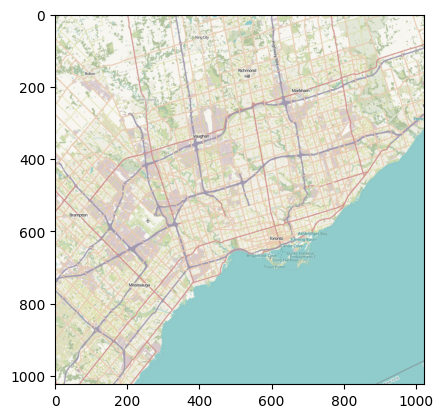

In [15]:
plt.imshow(toronto.im);

### The path of the `Place` object: `path`

In [16]:
caracas.path

'/content/gdrive/MyDrive/Colab Notebooks/Data Science/Applied Geospatial Data Science with Python - Book/data/caracas.tif'

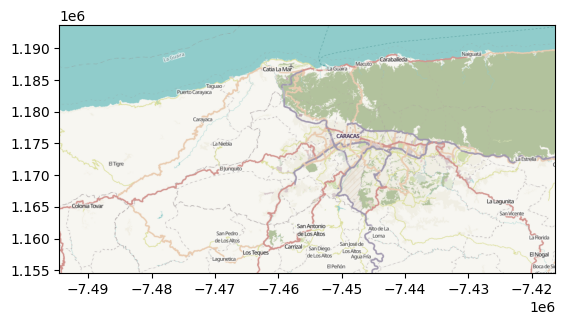

In [17]:
# note how we are accessing the path object
with rio.open(caracas.path) as r:
    rioshow(r)

### The centre coordinates

In [18]:
toronto.longitude, toronto.latitude

(-79.3839347, 43.6534817)

### The bounding box of the geocode place and the bounding box of the map

In [19]:
toronto.bbox,

([-79.6392832, 43.5796082, -79.1132193, 43.8554425],)

In [20]:
toronto.w, toronto.s, toronto.e, toronto.n

(-79.6392832, 43.5796082, -79.1132193, 43.8554425)

In [21]:
toronto.bbox_map

(-8883817.175416324, -8805545.658452304, 5381166.791276407, 5459438.308240427)

### Using `bbox_map`

- `bbox`:
    - lon/lat
    - minX, minY, maxX, maxY
    - w, s, e, n
- `bbox_map`:
    - Web Mercator
    - minX, maxX, minY, maxY
    - w, e, s, n
    - note, my order doesn't conform to the docs

In [22]:
toronto.bbox_map

(-8883817.175416324, -8805545.658452304, 5381166.791276407, 5459438.308240427)

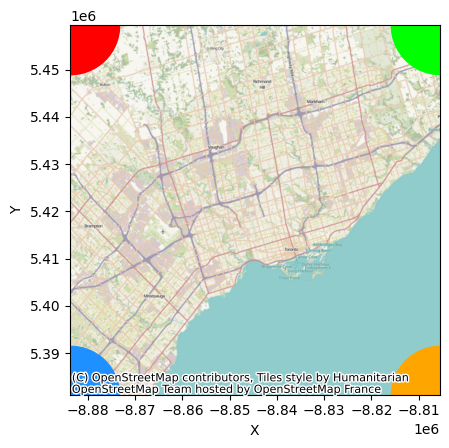

In [23]:
fig, ax = plt.subplots(1)
boundary = toronto.bbox_map


# minX, maxY
top_left = gpd.GeoDataFrame([Point(boundary[0], boundary[3])],
                            geometry=0,
                            crs='EPSG:3857')

# maxX, maxY
top_right = gpd.GeoDataFrame([Point(boundary[1], boundary[3])],
                             geometry=0,
                             crs='EPSG:3857')

# minX, minY
bottom_left = gpd.GeoDataFrame([Point(boundary[0], boundary[2])],
                            geometry=0,
                            crs='EPSG:3857')
#maxX, minY
bottom_right = gpd.GeoDataFrame([Point(boundary[1], boundary[2])],
                            geometry=0,
                            crs='EPSG:3857')


toronto.plot(ax=ax)
top_left.plot(c='red', markersize=5000, ax=ax)
top_right.plot(c='lime', markersize=5000, ax=ax)
bottom_left.plot(c='dodgerblue', markersize=5000, ax=ax)
bottom_right.plot(c='orange', markersize=5000, ax=ax);

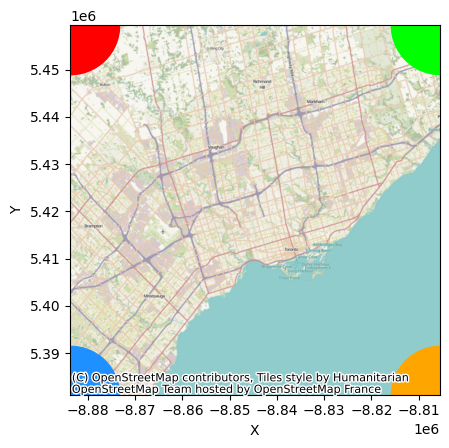

In [24]:
fig, ax = plt.subplots(1)
boundary = toronto.bbox_map


top_left = gpd.GeoDataFrame([Point(boundary[0], boundary[3])],
                            geometry=0)
top_right = gpd.GeoDataFrame([Point(boundary[1], boundary[3])],
                             geometry=0)
bottom_left = gpd.GeoDataFrame([Point(boundary[0], boundary[2])],
                            geometry=0)
bottom_right = gpd.GeoDataFrame([Point(boundary[1], boundary[2])],
                            geometry=0)


toronto.plot(ax=ax)
top_left.plot(c='red', markersize=5000, ax=ax)
top_right.plot(c='lime', markersize=5000, ax=ax)
bottom_left.plot(c='dodgerblue', markersize=5000, ax=ax)
bottom_right.plot(c='orange', markersize=5000, ax=ax);

In [25]:
toronto.bbox, toronto.bbox_map

([-79.6392832, 43.5796082, -79.1132193, 43.8554425],
 (-8883817.175416324,
  -8805545.658452304,
  5381166.791276407,
  5459438.308240427))

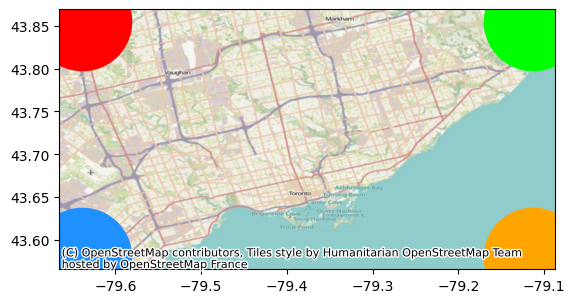

In [26]:
# indices 0, 1, 2, 3 map to 0, 2, 1, 3
fig, ax = plt.subplots(1)
boundary = toronto.bbox


top_left = gpd.GeoDataFrame([Point(boundary[0], boundary[3])],
                            geometry=0,
                            crs='EPSG:4326')
top_right = gpd.GeoDataFrame([Point(boundary[2], boundary[3])],
                             geometry=0,
                             crs='EPSG:4326')
bottom_left = gpd.GeoDataFrame([Point(boundary[0], boundary[1])],
                            geometry=0,
                            crs='EPSG:4326')
bottom_right = gpd.GeoDataFrame([Point(boundary[2], boundary[1])],
                            geometry=0,
                            crs='EPSG:4326')

top_left.plot(c='red', markersize=5000, ax=ax)
top_right.plot(c='lime', markersize=5000, ax=ax)
bottom_left.plot(c='dodgerblue', markersize=5000, ax=ax)
bottom_right.plot(c='orange', markersize=5000, ax=ax)

cx.add_basemap(ax=ax, crs=top_left.crs);

In [27]:
toronto.bbox

[-79.6392832, 43.5796082, -79.1132193, 43.8554425]

(-79.6392832, 43.5796082, -79.1132193, 43.8554425)


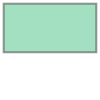

In [28]:
box_4326 = box(*toronto.bbox)
print(box_4326.bounds)
box_4326

In [29]:
gpd.GeoDataFrame({'geometry': [box_4326]}, crs='EPSG:4326').to_crs('EPSG:3857').geometry[0].bounds

(-8865404.452965306, 5400614.400894449, -8806843.287492583, 5443098.761710848)

In [30]:
toronto.bbox_map

(-8883817.175416324, -8805545.658452304, 5381166.791276407, 5459438.308240427)